In [1]:
import sys
sys.path.append("..")
import torch
import shutil
import subprocess
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from helpers import read_file

from tqdm import tqdm

from helpers import *
from model import *
from generate import *

## Train command

In [2]:
filename = '../data/regionTreeSeqs/andes_perulittle.txt'
model = 'lstm'
n_epochs = 10000
print_every = 500
hidden_size = 256
n_layers = 2
learning_rate = 1e-3
chunk_len = 9
batch_size = 50

train_command = "python train.py %s --model %s --n_epochs %d --print_every %d --hidden_size %d --n_layers %d --learning_rate %f --chunk_len %d --batch_size %d --cuda" % (filename, model, n_epochs, print_every, hidden_size, n_layers, learning_rate, chunk_len, batch_size)
print(train_command)

# subprocess.call(train_command, shell=True) 

python train.py ../data/regionTreeSeqs/andes_perulittle.txt --model lstm --n_epochs 10000 --print_every 500 --hidden_size 256 --n_layers 2 --learning_rate 0.001000 --chunk_len 9 --batch_size 50 --cuda


## Real Divide Tree Example

In [2]:
def drawResult(path):
    x = [v[0] for v in path]
    y = [v[1] for v in path]
    for point in path:
        plt.scatter(x, y, color='b')
    X = []
    Y = []
    for i in range(len(path) - 1):
        X.append([x[i], x[i+1]])
        Y.append([y[i], y[i+1]])
    for i in range(len(X)):
        plt.plot(X[i], Y[i], color='r')
    
def change2path(change):
    path = [[0,0]]
    for i in range(len(change)):
        path.append([path[-1][0] + change[i][0], path[-1][1] + change[i][1]])
    return path

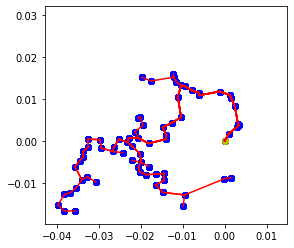

<Figure size 432x288 with 0 Axes>

In [3]:
demoDataDir = '../data/demoData/demotest1.txt'
allSeq, allSeqLen= read_file(demoDataDir)
for i in range(10):
    drawResult(change2path(allSeq[i]))
plt.scatter([0,0], [0,0], color='y')
plt.gca().set_aspect("equal")
plt.show()
plt.clf()